In [ ]:
# !pip install lightgbm

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_wine

import matplotlib.pyplot as plt

In [2]:
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
type(X_train)

pandas.core.frame.DataFrame

In [11]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [10]:
type(train_data)

lightgbm.basic.Dataset

In [12]:
params = {
    'objective': 'multiclass',
    'num_class': 3,  # 3 classes in the wine dataset
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

In [13]:
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -0.908259
[LightGBM] [Info] Start training from score -1.293921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [14]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [19]:
y_test

19     0
45     0
140    2
30     0
67     1
16     0
119    1
174    2
109    1
141    2
24     0
150    2
41     0
118    1
15     0
111    1
113    1
82     1
9      0
114    1
18     0
66     1
60     1
169    2
171    2
164    2
117    1
65     1
90     1
55     0
29     0
128    1
145    2
31     0
12     0
42     0
158    2
137    2
98     1
159    2
38     0
108    1
85     1
68     1
143    2
2      0
100    1
122    1
154    2
51     0
76     1
56     0
26     0
153    2
Name: target, dtype: int32

In [15]:
y_pred

array([[9.97961097e-01, 1.06992121e-03, 9.68981871e-04],
       [9.96438776e-01, 1.42661382e-03, 2.13461002e-03],
       [9.56028155e-03, 1.33674559e-02, 9.77072263e-01],
       [9.88555272e-01, 8.27550715e-03, 3.16922081e-03],
       [7.29168434e-03, 9.87142649e-01, 5.56566644e-03],
       [9.92912790e-01, 4.04343038e-03, 3.04377920e-03],
       [4.38525781e-04, 9.99184008e-01, 3.77466288e-04],
       [3.05915550e-03, 6.78897742e-04, 9.96261947e-01],
       [2.39560965e-03, 9.97243548e-01, 3.60842064e-04],
       [3.84624533e-02, 7.83907726e-03, 9.53698469e-01],
       [9.53876870e-01, 4.20527809e-02, 4.07034887e-03],
       [5.85888081e-02, 3.52222239e-01, 5.89188953e-01],
       [9.94999569e-01, 3.61333974e-03, 1.38709168e-03],
       [1.66962732e-03, 4.08441590e-01, 5.89888782e-01],
       [9.98647470e-01, 7.73429427e-04, 5.79100702e-04],
       [1.36736144e-03, 9.98194081e-01, 4.38557227e-04],
       [4.97811142e-04, 9.99176331e-01, 3.25858111e-04],
       [4.33538811e-04, 9.99249

In [16]:
y_pred_class = [list(x).index(max(x)) for x in y_pred] 

In [17]:
y_pred_class

[0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 2]

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred_class))

Accuracy: 0.9814814814814815


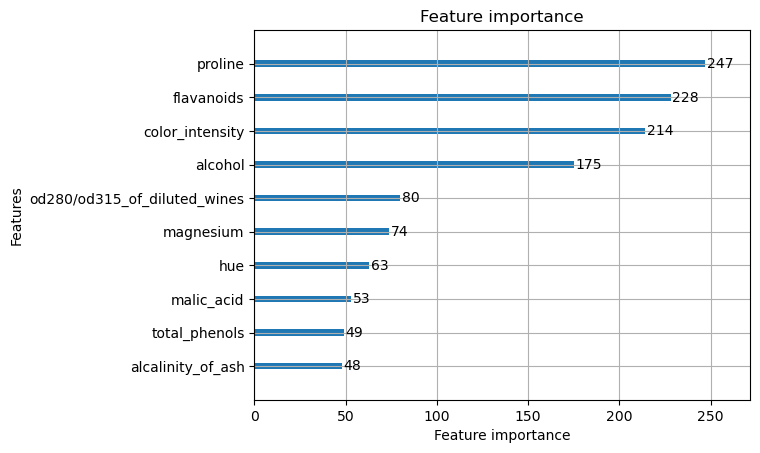

In [20]:
lgb.plot_importance(model, max_num_features=10)
plt.show()